<h1>Index<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [2]:
def get_all_files_in_a_folder(team, full=False):
    path = "data/{}".format(team)
    
    files = [f for f in glob.glob(path + "**/*.csv", recursive=True)]
    
    if not full:
        files = [file.replace(path + "/", "") for file in files]
        files = [file.replace(".csv", "") for file in files]
    
    return files

def aggregate_all_saved_sections_from_zones_files(team):
    files = get_all_files_in_a_folder(team, full=True)
    
    all_dataframes = []
    for file in files:
        all_dataframes.append(pd.read_csv(file))
        
    return pd.concat(all_dataframes)

In [9]:
team = "flamengo"
data = aggregate_all_saved_sections_from_zones_files(team)
data["article_time"] = data["date"].apply(lambda x: x.strip().split(" ")[1] if not pd.isnull(x) else x)
data["article_date"] = data["date"].apply(lambda x: x.strip().split(" ")[0] if not pd.isnull(x) else x)


In [10]:
data.shape

(6412, 6)

In [11]:
data["year-month"] = data["article_date"].apply(lambda x: x.split("/")[-1] + "-" + x.split("/")[1])

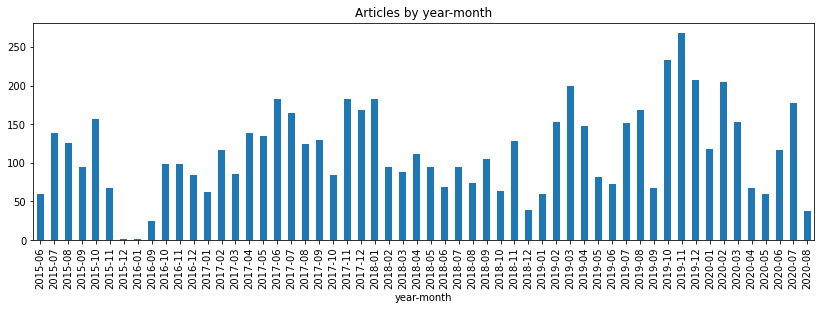

In [12]:
data.groupby("year-month")["title"].count().sort_index().plot(kind="bar",
                                                             figsize=(14, 4))
plt.title("Articles by year-month")
plt.show()